In [3]:
import sys
sys.path.insert(0,"..")
import ccs_eeg_utils
x = ccs_eeg_utils.simulate_ICA(dims=2)

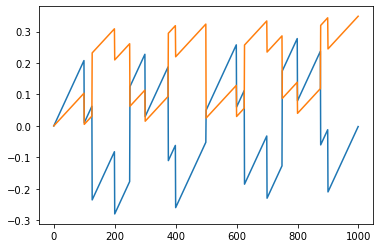

In [23]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot(x.T);

In [24]:
import scipy as scp
import scipy.stats
def whiten(x):
    mM = np.mean(x,axis=1)
    sph = np.linalg.inv(scp.linalg.sqrtm(np.cov(x)))
    xM = np.subtract(x.T,mM)
    whiteX = np.matmul(sph,xM.T)
    return whiteX
whiteX = whiten(x)

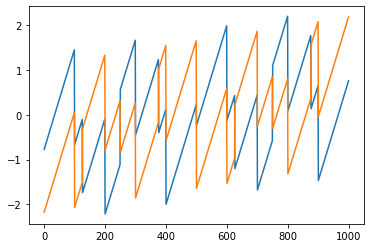

In [25]:
plt.plot(whiteX.T);

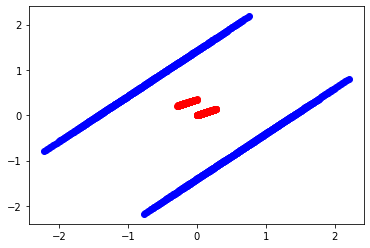

In [26]:
plt.plot(whiteX[0,:],whiteX[1,:],'bo')
plt.plot(x[0,:],x[1,:],'ro');

In [27]:
# arbitrary 2d rotation matrix
turn =lambda k: np.reshape(np.array([np.cos(k), np.sin(k), -np.sin(k), np.cos(k)]),(2,2))
kurt = []
# rotate from 0 to pi
r = np.linspace(0,2*np.pi,1000)
for l in r:
    # turn 
    x_bar = np.matmul(turn(l),whiteX)
    # calc kurtosis
    kurt.append(np.sum(np.abs(scp.stats.kurtosis(x_bar,axis=1))))


224.14414414414412


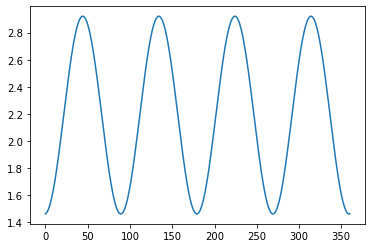

In [28]:
plt.plot(r/np.pi*180,kurt)
best_turn = r[np.argmax(kurt)]
print(best_turn/np.pi*180)

In [29]:
x_unmixed = np.matmul(turn(best_turn),whiteX)

In [ ]:
x_unmixed = np.matmul(turn(45. /180 * np.pi),whiteX)
plt.plot(x_unmixed.T)
x_unmixed = np.matmul(turn(135. /180 * np.pi),whiteX)
plt.plot(x_unmixed.T)
x_unmixed = np.matmul(turn((180. + 45.) /180 * np.pi),whiteX)
plt.plot(x_unmixed.T);

In [ ]:
plt.plot(x.T);

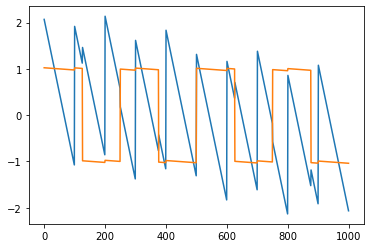

In [30]:
plt.plot(x_unmixed.T);

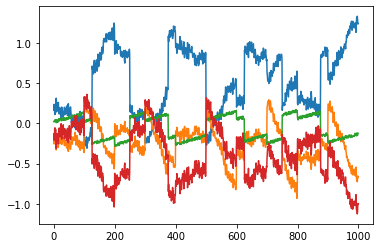

In [31]:
x = ccs_eeg_utils.simulate_ICA(dims=4)
plt.plot(x.T);

In [4]:
import mne
unmix = mne.preprocessing.infomax(x.T,verbose=True)

Computing Extended Infomax ICA
step 1 - lrate 0.007213, wchange 439.64796958, angledelta  0.0 deg
step 2 - lrate 0.007213, wchange 147.64923695, angledelta  0.0 deg
step 3 - lrate 0.007213, wchange 9.17729304, angledelta 149.8 deg
step 4 - lrate 0.006492, wchange 3.00857525, angledelta 152.3 deg
step 5 - lrate 0.005843, wchange 0.28983694, angledelta 131.5 deg
step 6 - lrate 0.005259, wchange 2.55396760, angledelta 63.3 deg
step 7 - lrate 0.004733, wchange 1.25576871, angledelta 129.9 deg
step 8 - lrate 0.004259, wchange 3.60682907, angledelta 104.2 deg
step 9 - lrate 0.003834, wchange 0.78706908, angledelta 138.9 deg
step 10 - lrate 0.003450, wchange 0.15855737, angledelta 109.7 deg
step 11 - lrate 0.003105, wchange 0.29316184, angledelta 73.3 deg
step 12 - lrate 0.002795, wchange 0.66305510, angledelta 107.9 deg
step 13 - lrate 0.002515, wchange 0.76104828, angledelta 152.1 deg
step 14 - lrate 0.002264, wchange 1.39815136, angledelta 96.6 deg
step 15 - lrate 0.002037, wchange 0.16916

step 124 - lrate 0.000001, wchange 0.00000000, angledelta 163.7 deg
step 125 - lrate 0.000001, wchange 0.00000001, angledelta 135.3 deg
step 126 - lrate 0.000001, wchange 0.00000001, angledelta 22.6 deg
step 127 - lrate 0.000001, wchange 0.00000000, angledelta 171.8 deg
step 128 - lrate 0.000000, wchange 0.00000001, angledelta 101.7 deg
step 129 - lrate 0.000000, wchange 0.00000000, angledelta 93.2 deg
step 130 - lrate 0.000000, wchange 0.00000000, angledelta 50.7 deg
step 131 - lrate 0.000000, wchange 0.00000000, angledelta 106.7 deg
step 132 - lrate 0.000000, wchange 0.00000000, angledelta 154.1 deg
step 133 - lrate 0.000000, wchange 0.00000000, angledelta 160.3 deg
step 134 - lrate 0.000000, wchange 0.00000001, angledelta 115.0 deg
step 135 - lrate 0.000000, wchange 0.00000000, angledelta 160.6 deg
step 136 - lrate 0.000000, wchange 0.00000000, angledelta 108.2 deg
step 137 - lrate 0.000000, wchange 0.00000000, angledelta 141.6 deg
step 138 - lrate 0.000000, wchange 0.00000000, angl

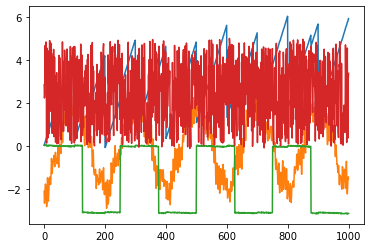

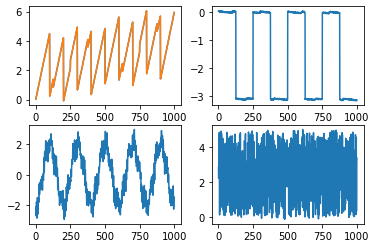

In [33]:
plt.plot(np.dot(unmix,x).T)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(np.dot(unmix,x)[0,:])
axs[0, 0].plot(np.dot(unmix,x)[0,:])
axs[1, 0].plot(np.dot(unmix,x)[1,:])
axs[0, 1].plot(np.dot(unmix,x)[2,:])
axs[1, 1].plot(np.dot(unmix,x)[3,:]);


In [6]:
from mne_bids import (BIDSPath,read_raw_bids)
import mne_bids
bids_root = "../local/bids/"
bids_root = "/bigpool/export/users/ehinger/erp-core/bids" # Bene's Server location
bids_root = "/store/data/erp-core/"
subject_id = '003'


bids_path = BIDSPath(subject=subject_id,task="P3",
                     datatype='eeg', suffix='eeg',session="P3",
                     root=bids_root)
print(bids_path)
raw = read_raw_bids(bids_path)
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()
raw.filter(0.5,50, fir_design='firwin')
raw.set_montage('standard_1020',match_case=False)



/store/data/erp-core/sub-003/ses-P3/eeg/sub-003_ses-P3_task-P3_eeg.set
Reading /store/data/erp-core/sub-003/ses-P3/eeg/sub-003_ses-P3_task-P3_eeg.fdt
Reading events from /store/data/erp-core/sub-003/ses-P3/eeg/sub-003_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> resp

    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renami

/tmp/ipykernel_1691702/3619079600.py:13: RuntimeWarning: Data file name in EEG.data (sub-003_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-003_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)


    Renaming event: stimulus -> stimulus/25
    Renaming event: stimulus -> stimulus/24
    Renaming event: stimulus -> stimulus/22
    Renaming event: stimulus -> stimulus/23
    Renaming event: stimulus -> stimulus/22
    Renaming event: stimulus -> stimulus/25
    Renaming event: stimulus -> stimulus/23
    Renaming event: stimulus -> stimulus/22
    Renaming event: stimulus -> stimulus/22
    Renaming event: stimulus -> stimulus/22
    Renaming event: stimulus -> stimulus/21
    Renaming event: stimulus -> stimulus/23
    Renaming event: stimulus -> stimulus/22
    Renaming event: stimulus -> stimulus/24
    Renaming event: stimulus -> stimulus/13
    Renaming event: stimulus -> stimulus/13
    Renaming event: stimulus -> stimulus/15
    Renaming event: stimulus -> stimulus/14
    Renaming event: stimulus -> stimulus/14
    Renaming event: stimulus -> stimulus/13
    Renaming event: stimulus -> stimulus/14
    Renaming event: stimulus -> stimulus/13
    Renaming event: stimulus -> 

<RawEEGLAB | sub-003_ses-P3_task-P3_eeg.fdt, 33 x 386048 (377.0 s), ~97.2 MB, data loaded>

In [7]:
    ica = mne.preprocessing.ICA(method="picard") # picard is fast and supposedly good; infomax is slow but good
    ica.fit(raw,verbose=True)
    

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 30 components
Fitting ICA took 32.8s.


Method,picard
Fit,92 iterations on raw data (386048 samples)
ICA components,30
Explained variance,100.0 %
Available PCA components,30
Channel types,eeg
ICA components marked for exclusion,—


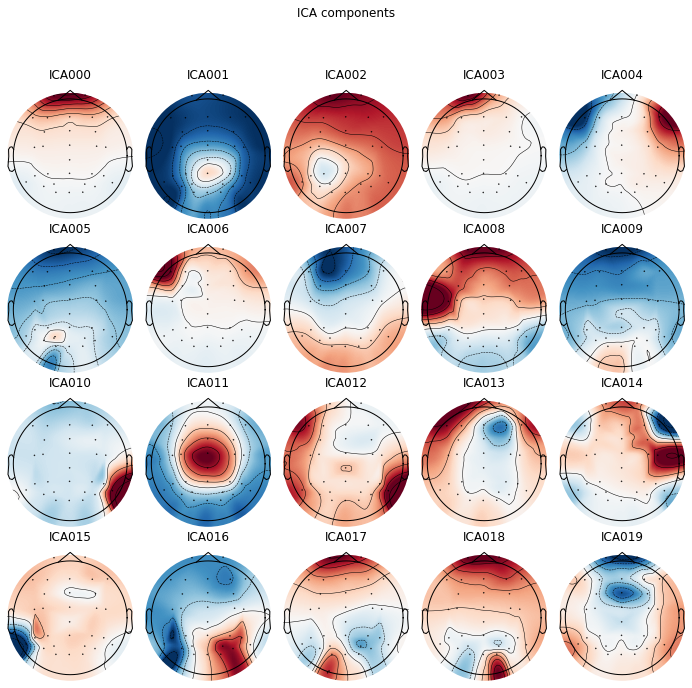

In [8]:
ica.plot_components(range(20));

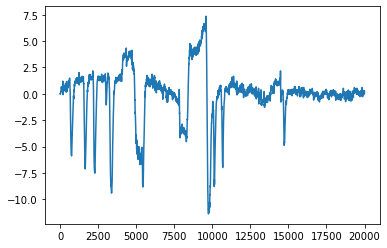

In [48]:
icaact = ica.get_sources(raw)
plt.plot(icaact[1,0:20000][0].T);
#plt.plot(raw[0,0:20000][0].T)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
188 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


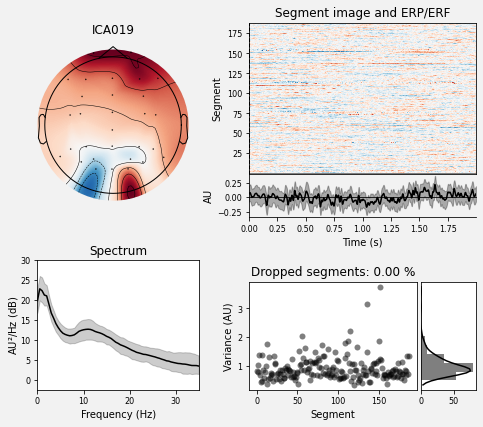

In [56]:
ica.plot_properties(raw,picks=[0,1,7],psd_args={'fmax': 35.},reject=None);

In [9]:
ica_infomax = mne.preprocessing.ICA(method="infomax") # picard is fast and supposedly good; infomax is slow but good
ica_infomax.fit(raw,verbose=True)
    

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 30 components
 


/home/ehinger/miniconda3/envs/eegCourse/lib/python3.10/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 281.0s.


Method,infomax
Fit,500 iterations on raw data (386048 samples)
ICA components,30
Explained variance,100.0 %
Available PCA components,30
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
import mne
evts,evts_dict = mne.events_from_annotations(raw)
wanted_keys = [e for e in evts_dict.keys() if "response" in e]
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)

In [ ]:
reconst_raw = raw.copy()
#ica.apply(reconst_raw,exclude=[1,8,9])

#raw.plot()
#reconst_raw.plot()  
ica.plot_overlay(raw,exclude=[1,8,9]);


whiteX = whiten(x)

w = np.eye(x.shape[0])

#f = lambda x: np.tanh(x)
#f = lambda x: x-np.tanh(x)
I = np.eye(x.shape[0]) 
#f =lambda x:  1./(1+np.exp(-x))
f = lambda x:  (2 / (1 + np.exp(-x)))
lr = 0.01


bias1 = np.zeros((x.shape[0], 1))
for k in range(0,50000):
    u = np.matmul(w,whiteX)
    
    #A = np.matmul(f(u),u.T)
    #A = np.dot(f(u),u.T)
    #dW = lr * np.dot(( I - A ),w)



    unmixed = np.dot(w, whiteX) + bias1
    logit = 1 - (2 / (1 + np.exp(-unmixed)))
    w = w + lr * np.dot(I + np.dot(logit, unmixed.T), w)
    bias1 = bias1 + lr * logit.sum(axis=1).reshape(bias1.shape)

    if np.mod(k,5000)==0:
        print(A)

    if np.max(np.abs(w))>100:
        print("reducing learningrate \n")
        lr = lr*0.2
        # reset w
        w = np.eye(x.shape[0]) 
        continue
    w = w+ dW

    #u2 = w2*x;
    #w2 = w2+0.0001*(I+ (1- 2*f2(u2))*u2')*w2;


